# Analyzing Cain's Jawbone with Word Vectoring and K-Means Clustering

## Cain’s Jawbone
First, let's load *Cain’s Jawbone* as a DataFrame.

In [1]:
import pandas as pd

df_cain = pd.read_json("./jawbone.json")

# ensure that the input file is complete
if len(df_cain[df_cain["text"].notna() & (df_cain["text"] != "")]) != 100:
    print("Error: the original corpus is incomplete")
    exit

df_cain.head()

,page,text
0,1,I sit down alone at the appointed table and ta...
1,2,I plunged for the last time. The few remaining...
2,3,"At my meeting with Clement yesterday, he had b..."
3,4,And I really think I would have preferred the ...
4,5,I hated my eye for being caught by what didn’t...


_(Reserved for later use)_ Then, an unofficial solution from our previous manual attempt shared at [https://glthr.com/cj/](glthr.com/cj/) is loaded. It will only adjust the models as the training is unsupervised.

In [2]:
import json

f = open("./unofficial_solution.json")
possible_solutions = json.load(f)
f.close()

possible_solutions

{'Oscar Mills': [92, 42, 2, 38, 90, 62, 53, 14, 66, 74, 83, 31],
 'May Doncaster': [72, 49, 13, 26, 44, 94, 16, 68, 58, 5, 81, 77, 35],
 'Sir Paul Trinder': [28, 9, 52, 12, 50, 65, 18, 34, 76, 89, 78, 98],
 'Clement DeAth': [54, 80, 91, 71, 59, 86, 24, 6, 21, 36, 29, 75, 60],
 'Bill Hardy': [1, 96, 17, 23, 87, 43, 84, 63, 47, 4, 30, 100],
 'Jasmine Gay': [69, 56, 27, 37, 7, 45, 82, 41, 93, 11, 15, 95, 70],
 'John Walker': [32, 3, 25, 73, 67, 51, 55, 61, 20, 40, 97, 85],
 'Henry (dog)': [64, 22, 79, 48, 88, 39, 46, 10, 99, 8, 19, 57, 33]}

## Naive Clustering

TF-IDF word vectorization.

In [3]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

tokenized_sentences = [word_tokenize(sentence) for sentence in df_cain["text"]]

# words vectorization (TF-IDF)
vectorizer = TfidfVectorizer(analyzer="word")
X = vectorizer.fit_transform([" ".join(tokens) for tokens in tokenized_sentences])

print(f"{X.shape} vectors")

(100, 3789) vectors


K-means clustering performed with the *known* number of clusters.

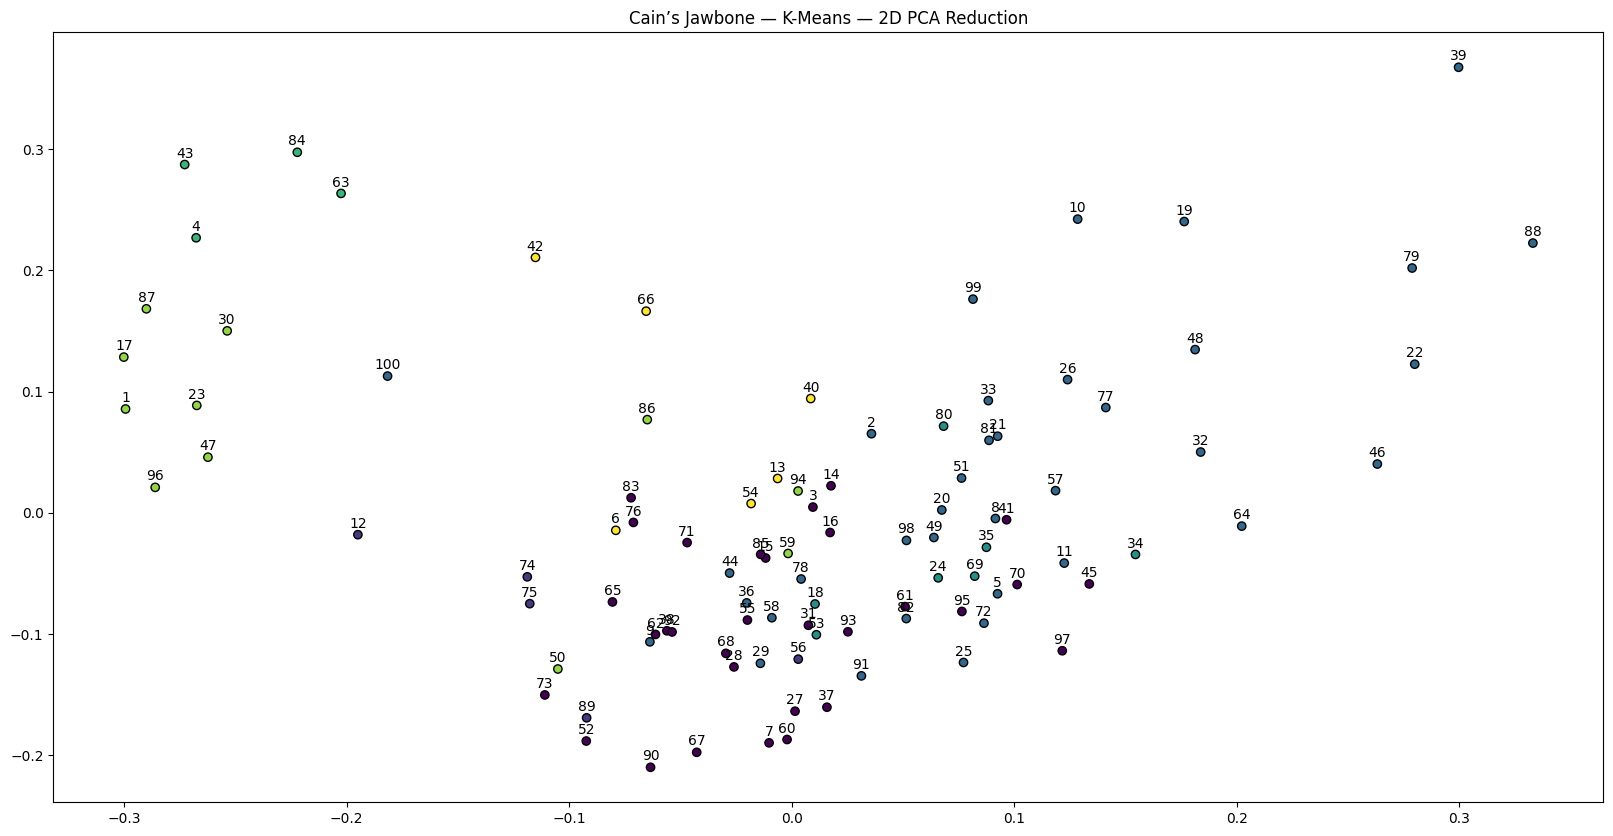

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# the number of clusters is defined from the unofficial solution
k = 7

kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

df_cain["cluster"] = labels

# dimensionality reduction (2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# plot
plt.figure(figsize=(20, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", edgecolor="k")
for i, txt in enumerate(df_cain["page"]):
    plt.annotate(
        txt,
        (X_pca[i, 0], X_pca[i, 1]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )

plt.title("Cain’s Jawbone — K-Means — 2D PCA Reduction")
plt.show()

## Preliminary Analysis

A comparison with the expected solution reveals that this clustering cannot properly group the pages by narrator. While this observation was expected, given that pages are extra contextually interrelated, the Principal Components Analysis reduction reveals an affinity between some pages. The most complete group, containing all the pages, is related to Bill Hardy. The second group, which is missing a couple of pages, belongs to Henry.

![Clusters](./clusters.png)

## To be completed...